Presented by: Reza Saadatyar (2024-2025) <br/>
E-mail: Reza.Saadatyar@outlook.com 

✅ **Creating Deep Learning model step by step**<br/>
- `Data Preprocessing:`
  - *Cleaning:* Handle missing values, remove duplicates, and correct errors.
  - *Normalization/Standardization:* Scale numerical data to improve the model's performance.
  - *Encoding:* Convert categorical data into numerical format (e.g., `one-hot encoding` or `label encoding`).
  - *Augmentation (for images):* Apply transformations like rotations, flips, and shifts to artificially expand the dataset.
- `Data Splitting:`<br/>
   Divide the data into training, validation, and test sets (e.g., 70% training, 15% validation, 15% testing).
- `Choose a Model Architecture (Select Model Type):`
  - *Feedforward Neural Networks (FNNs)* for tabular data.
  - *Convolutional Neural Networks (CNNs)* for image classification.
  - *Recurrent Neural Networks (RNNs)* or *Long Short-Term Memory (LSTM)* networks for time series or sequence data.
  - *Transformers* for language models or advanced sequence processing.
- `Define Layers:`<br/> 
   Determine the number of layers, *types of layers* (`Dense, Conv2D`, `LSTM`, etc.), *activation functions* (`ReLU`, `Sigmoid`, `Softmax`), and *layer configurations*.
- `Configure the Model (Compile the Model):`
  - *Loss Function:* Choose an appropriate loss function (e.g., `categorical cross-entropy for classification`, `mean squared error` for regression).
  - *Optimizer:* Select an optimizer (e.g., `SGD`,` Adam`) to update model weights during training.
  - *Metrics:* Specify metrics to evaluate the model's performance (e.g., `accuracy`, `precision`).
- `Train the Model:`
   - *Set Hyperparameters:*
      - Batch Size: Number of samples processed before the model is updated.
      - Epochs: Number of complete passes through the training dataset.
      - Learning Rate: Controls how much to adjust the weights during training.
   - *Training Process:*
      - Fit the model on the training data using the `.fit()` method (if using libraries like TensorFlow/Keras).
      - Use validation data to tune the model and check for overfitting or underfitting.
   - *Monitor Training:*<br/>
      Use callbacks like *Early Stopping*, *Model Checkpoint*, or *Learning Rate Schedulers* to improve training efficiency.
- `Evaluate the Mode:`
   - *Performance on Test Data:* Evaluate the model on the test set to check how well it generalizes to unseen data.
   - *Metrics Analysis:* Review performance metrics such as accuracy, loss, confusion matrix, ROC-AUC for classification, or R-squared for regression.
   - *Error Analysis:* Identify specific instances where the model fails to perform well and understand the reasons.
- `Tune the Model (Hyperparameter Tuning):`
   - *Adjust Hyperparameters:* Experiment with different hyperparameters (`learning rate`, `batch size`, `number of layers`, `neurons per layer`, etc.).
   - *Cross-Validation:* Use techniques like `k-fold cross-validation` to better assess model performance.
   - *Automated Tuning:* Utilize tools like `Grid Search`, `Random Search`, or `Bayesian Optimization` for systematic hyperparameter tuning.
- `Deploy the Model:`
   - *Model Export:* Save the trained model in a format suitable for deployment (e.g., `HDF5`, `SavedModel`).
   - *Deployment Options:* Choose how to deploy the model (e.g., as a `REST API using Flask/Django`, `using cloud services like AWS, Azure, or GCP`).

**Import Libraries**

In [ ]:
# !pip list    # List the installed packages
import numpy as np
import tensorflow as tf               # print(tf.__version__)
from tensorflow import keras
import matplotlib.pyplot as plt

**Load data** <br/>
[MNIST Dataset](https://www.tensorflow.org/datasets/catalog/mnist)<br>
[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [5]:
name = 1          # 1:mnist; 2:fashion_mnist
if name == 1:
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()         # 70,000 28x28
else:
    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data() # 70,000 28x28
    
print(f"{x_train.shape = }")                              # (Number of images, 28 , 28)
print(f"{x_test.shape = }")                               # (Number of images, 28 , 28)
print(f"{y_train.shape = }")                              # (Number of label)
print(f"{y_test.shape = }")                               # (Number of label)
print(f"{y_train = }")                                    # Train labels
print(f"{x_train[0, 0:2, :] = }")                         # (Image 0, 0:2 out of 28, 28) ==> Ankle boot

labels = np.unique(y_test)
print(f"{labels = }")

x_train.shape = (60000, 28, 28)
x_test.shape = (10000, 28, 28)
y_train.shape = (60000,)
y_test.shape = (10000,)
y_train = array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)
x_train[0, 0:2, :] = array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=uint8)
labels = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)


**Data normalization**<br/>
`Improves Training Stability:` Models, especially neural networks, are sensitive to the scale of input data. Features with large ranges can dominate the learning process, leading to slower convergence or convergence to suboptimal solutions.<br/>
`Faster Convergence:` Normalization helps optimization algorithms converge faster by scaling features to a similar scale.<br/>
`Prevents Numerical Instability:` Neural networks can experience numerical instability when working with features that have very large or very small values.<br/>
`Required by Algorithms:` Some distance-based algorithms (e.g., `k-nearest neighbors`, `SVMs with RBF kernels`) perform better when features are on the same scale.<br/>

***Common Methods of Normalization***
- `Min-Max Scaling:` Normalizes or scales the data to a specified range, typically [0, 1] or [a, b]. Best suited for uniformly distributed data with no significant outliers.<br/>
   $X_{\text{scaled}} = \large \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$
- `Standardization (Z-Score):` Standardizes features by removing the mean and scaling to unit variance. Useful when the data is normally distributed or when the distribution of data varies significantly across features.<br/> 
   $X_{\text{standardized}} = \large \frac{X - \mu}{\sigma}$<br/>
   $\mu$ is the mean and $\sigma$ is the standard deviation of the feature.
- `Mean:` Similar to standardization but scales data to have a mean of 0 and a range between -1 and 1.<br/>
   $X_{\text{normalized}} = \large \frac{X - \mu}{X_{\text{max}} - X_{\text{min}}}$
   $\mu$ is the mean.

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0
# x_train = x_train.astype("float32") / 255
# x_test = x_test.astype("float32") / 255

# x_train = np.expand_dims(x_train, -1)          # Make sure images have shape (28, 28, 1)
# x_test = np.expand_dims(x_test, -1)

# y_train = keras.utils.to_categorical(y_train, len(labels)) # convert class vectors to binary class matrices
# y_test = keras.utils.to_categorical(y_test, len(labels))

**Plot Data**

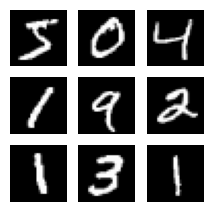

In [7]:
plt.figure(figsize=(2.5, 2.5))
for i in range(len(labels) - 1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i, :, :], cmap='gray')
    plt.autoscale(axis="both", tight=True, enable=True)
    plt.axis("off")

✅ **Creating a [Sequential Model]((https://keras.io/guides/sequential_model/)) Step-by-Step**<br/>
- `Initialize the Sequential Model:` A linear stack of layers where you can add each layer sequentially.<br/>
- `Add Layers to the Model:`
  - [Dense layer: ](https://keras.io/api/layers/core_layers/dense/) Each neuron in this layer is connected to every neuron in the previous layer.<br/>
  - [Activation functions:](https://keras.io/api/layers/activations/) Activation functions introduce non-linearity, enabling neural networks to learn complex patterns and relationships.<br/>
  - [Flatten layer:](https://keras.io/api/layers/reshaping_layers/flatten/) Flattens multi-dimensional input into a 1D vector, often used before dense layers when working with convolutional or other multi-dimensional data. Does not affect the batch size.<br/>

**Activation Functions**
- `ReLU (Rectified Linear Unit):` ReLU is used for hidden layers to quickly learn positive linear relationships, simplicity and effectiveness. <br/> $relu(x) = max(0, x)$
- `Sigmoid:` Sigmoid outputs a value between 0 and 1, making it suitable for binary classification tasks to represent probabilities.<br/>
  $f(x) = \Large  \frac{1}{1 + e^{-x}}$
- `Softmax:` Converts a vector of values into a probability distribution, where the sum of the probabilities is 1. Softmax is used for multi-class classification.<br/>
   $f(x)_i = \Large \frac{e^{x_i}}{\sum_{j} e^{x_j}}$
- `Tanh (Hyperbolic Tangent):` Maps input values to the range (-1, 1), centering the data which can make learning easier in some cases. Useful in recurrent neural networks (RNNs) and sometimes in hidden layers.<br/>
   $f(x) = \Large \frac{e^x - e^{-x}}{e^x + e^{-x}}$
- `Leaky ReLU:` A variation of ReLU that allows a small, non-zero gradient when the unit is not active, which helps avoid dead neurons. Hidden layers where ReLU may lead to dead neurons.<br/>
   $f(x) = \small \begin{cases}  x & \text{if } x > 0 \\ \alpha \times x & \text{if } x \leq 0 \end{cases}$<br/>
   $\alpha$ is a small coefficient (typically small, like 0.01), which ensures that the function does not become zero when $x$ is negative.
- `ELU (Exponential Linear Unit):` ELU has negative values for negative inputs, which helps in zero-centered outputs, potentially speeding up training hidden layers where faster learning is desired.<br/>
$f(x) = \small \begin{cases} x & \text{if } x > 0 \\ \alpha \times (e^x - 1) & \text{if } x \leq 0 \end{cases}$<br/>
$\alpha$ is a hyperparameter that controls the value to which an ELU saturates for negative net inputs (usually a small positive number).
- `SELU (Scaled Exponential Linear Unit):`  SELU scales outputs automatically to maintain the mean and variance of inputs, which can lead to self-normalizing properties of the network.<br/>
  $f(x) = \small \lambda \times \begin{cases} x & \text{if } x > 0 \\ \alpha \times (e^x - 1) & \text{if } x \leq 0 \end{cases}$<br/>
  $\alpha$ and $\lambda$ are predefined constants. For standard SELU, $ \small \alpha \approx 1.67326$ and $ \small \lambda \approx 1.0507$.
- `Linear:` Typically used in the output layer of regression models. $f(x) = x$




In [8]:
# ========================== Define Sequential model with 3 layers using 2 methods =============================
def building_model(x_train,units_layer1, units_layer2, units_output, fun_output, method=1):
    global model  # Declare model as a global variable to access outside the function
    if method==1: # Condition to check if method 1 is chosen
        model = keras.models.Sequential() # Initialize a sequential model
        # Layer input : Input must be vectored; x_train.shape[1:3]:(28, 28)
        model.add(keras.layers.Input(shape=x_train.shape[1:3]))  # Using Input layer to specify input shape
        model.add(keras.layers.Flatten())  # Flatten layer without specifying input_shape
        model.add(keras.layers.Flatten(input_shape=x_train.shape[1:3]))         
        model.add(keras.layers.Dense(units_layer1, activation="relu")) # First dense layer with ReLU activation
        model.add(keras.layers.Dense(units_layer2, activation="relu")) # Second dense layer with ReLU activation
        # Layer output: 10 neuron = 10 class; Multi classification then activation is softmax
        model.add(keras.layers.Dense(units_output, activation=fun_output))      
    elif method==2:
        model = keras.models.Sequential([                  # Initialize a sequential model with a list of layers
            keras.layers.Input(shape=x_train.shape[1:3]),  # Using Input layer to specify input shape
            keras.layers.Flatten(),                        # Flatten layer without specifying input_shape
            keras.layers.Dense(units_layer1, activation="relu"),   # First dense layer with ReLU activation
            keras.layers.Dense(units_layer2, activation="relu"),   # Second dense layer with ReLU activation
            # Layer output: 10 neuron = 10 class; Multi classification then activation is softmax
            keras.layers.Dense(units_output, activation=fun_output)
            ])
    return model # Return the constructed model

# Example usage of the building_model function
model= building_model(x_train, units_layer1=100, units_layer2=75, units_output=10, fun_output="softmax", 
                      method=2)
print(f"{model.layers = }")
weights, bias = model.layers[1].get_weights()         # weights & bias in first layer
print(f"{weights = }; {weights.shape = }")
print(f"{bias = }; {bias.shape = }")
model.summary()                                       # Display the model's architecture

model.layers = [<Flatten name=flatten, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]
weights = array([[ 0.01006216,  0.03960221,  0.06043725, ...,  0.01598875,
        -0.0157498 ,  0.0169938 ],
       [-0.01578398, -0.00164554, -0.08216935, ...,  0.06583008,
         0.06229724, -0.01255444],
       [-0.05684687, -0.08169171, -0.07868788, ..., -0.07243017,
        -0.06095254, -0.03033968],
       ...,
       [ 0.06028508,  0.00861164, -0.03353247, ..., -0.00228387,
        -0.07680766, -0.06142668],
       [-0.04687562,  0.0776808 , -0.02660108, ...,  0.00069628,
         0.02836246, -0.01300664],
       [-0.02143099, -0.00064106,  0.05794291, ...,  0.05251974,
        -0.04840484,  0.04075508]], dtype=float32); weights.shape = (784, 100)
bias = array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

**[Compile the model](https://keras.io/api/models/model_training_apis/)**<br/> 
- *Loss Function:* Choose an appropriate loss function (e.g., `categorical cross-entropy for classification`, `mean squared error` for regression).
- *Optimizer:* Select an optimizer (e.g., `SGD`,` Adam`) to update model weights during training.
- *[Metrics](https://keras.io/api/metrics/):* Specify metrics to evaluate the model's performance (e.g., `accuracy`, `precision`).

**Loss functions in classification**<br/>
  1. `Categorical Cross-Entropy Loss (Log Loss):` Cross-entropy loss compares the true labels with the predicted probabilities. This type of loss is widely used in multi-class and binary classifications (binary cross-entropy). The loss value increases when the predicted probability deviates from the true label, and it penalizes confident but incorrect predictions. Cross-entropy is differentiable, making it suitable for optimization methods based on gradients. Commonly used in neural networks for multi-class classification with softmax output.<br/>
  *Target Labels:*The true labels are provided as a one-hot encoded vector, where the vector is of length C (the number of classes), and only the index corresponding to the true class has a value of 1, with all other indices being 0 ([1,0,0],[0,1,0],[0,0,1]).<br/>
  $\text{Cross-Entropy} = \large -\frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{i,c} \log(\hat{p}_{i,c})$<br/>
  $y_{i,c}$ is a binary indicator (0 or 1) if class label *c* is the correct classification for observation *i*.<br/> 
  $\hat{p}_{i,c}$ is the predicted probability that observation *i* is of class *c*.<br/>
  *C* is the number of classes.

  2. `Sparse Categorical Cross-Entropy:` It is used when labels are provided as integers representing the correct class index, a more efficient alternative, especially for problems with a large number of classes.<br/>
  *Target Labels:* The true labels are provided as integers instead of one-hot encoded vectors ([0],[1],[2]).<br/>
  $\text{Sparse Cross-Entropy} = -\sum_{i=1}^{n} \log(\hat{p}_{i,\text{true label}})$ <br/>
  $\hat{p}_{i,\text{true label}}$ is the predicted probability for the correct class.
  
  3. `Hinge Loss (Used in Support Vector Machines - SVMs):` Hinge Loss is primarily used in training SVMs. Its primary goal is to ensure that predictions are not only correct but also confidently correct by a certain margin. Correct predictions with a margin of at least 1 have zero hinge loss, while incorrect predictions are penalized based on their distance from the decision boundary. Hinge loss is used for binary classification but can be adapted for multi-class classification.<br/> 
  $\text{Hinge Loss} = \sum_{i=1}^{n} \max(0, 1 - y_i \cdot f(\mathbf{x}_i))$<br/> 
  $y_i$ is the true label (-1 or +1 for binary classification)<br/> 
  $f(\mathbf{x}_i)$ is the predicted score (before applying the sign function to determine the class).

  4. `Kullback-Leibler Divergence (KL Divergence):` KL Divergence measures the difference between two probability distributions, commonly used in classification tasks where understanding the probabilistic interpretation of the output is important. When the predicted distribution matches the true distribution, the KL divergence is zero, but it increases as the distributions diverge. KL divergence is often used alongside other loss functions or in tasks such as language modeling, where output distributions are compared.<br/>
  $D_{\text{KL}}(P \parallel Q) = \sum_{i=1}^{n} p_i \log\left(\frac{p_i}{q_i}\right)$<br/>
  $p_i$ is the true distribution.
  $q_i$ is the predicted distribution.

*`Steps to training network:`*
- Define the network
- Prepare the training data
- Define loss and optimizer
- Train the model on training inputs by minimizing loss using custom optimizer
- Validate the model

*`Shortcomings of Sequential API:`*
 - The model has multiple inputs or multiple outputs
 - Need to do layer-sharing
 - Non-linear topology (e.g. a residual connection, a multi-branch model)
 - Add recursion in your model (e.g. for and while loops)

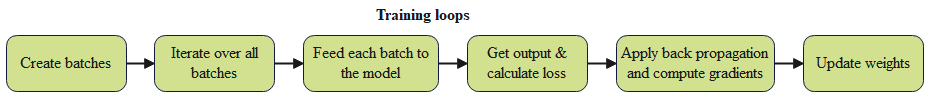


- `Train the Model:` Fit the model to the training data by specifying the number of epochs and batch size.


  
- `Train the Model:`
   - *Set Hyperparameters:*
      - Batch Size: Number of samples processed before the model is updated.
      - Epochs: Number of complete passes through the training dataset.
      - Learning Rate: Controls how much to adjust the weights during training.
   - *Training Process:*
      - Fit the model on the training data using the `.fit()` method (if using libraries like TensorFlow/Keras).
      - Use validation data to tune the model and check for overfitting or underfitting.
   - *Monitor Training:*<br/>
      Use callbacks like *Early Stopping*, *Model Checkpoint*, or *Learning Rate Schedulers* to improve training efficiency.
- `Evaluate the Mode:`
   - *Performance on Test Data:* Evaluate the model on the test set to check how well it generalizes to unseen data.
   - *Metrics Analysis:* Review performance metrics such as accuracy, loss, confusion matrix, ROC-AUC for classification, or R-squared for regression.
   - *Error Analysis:* Identify specific instances where the model fails to perform well and understand the reasons.
- `Tune the Model (Hyperparameter Tuning):`
   - *Adjust Hyperparameters:* Experiment with different hyperparameters (`learning rate`, `batch size`, `number of layers`, `neurons per layer`, etc.).
   - *Cross-Validation:* Use techniques like `k-fold cross-validation` to better assess model performance.
   - *Automated Tuning:* Utilize tools like `Grid Search`, `Random Search`, or `Bayesian Optimization` for systematic hyperparameter tuning.
- `Deploy the Model:`
   - *Model Export:* Save the trained model in a format suitable for deployment (e.g., `HDF5`, `SavedModel`).
   - *Deployment Options:* Choose how to deploy the model (e.g., as a `REST API using Flask/Django`, `using cloud services like AWS, Azure, or GCP`).

- Creating a Sequential model<br/>
  - [Sequential model](https://keras.io/guides/sequential_model/)<br/>
  - [Dense layer](https://keras.io/api/layers/core_layers/dense/)<br/>
  - [Activation functions](https://keras.io/api/layers/activations/)<br/>
  - [Flatten layer](https://keras.io/api/layers/reshaping_layers/flatten/)<br/>
 - Compile the model
 - Train the model
 - Evaluate the model
 - Save the model

**Articles:**<br/>
[Perceptrons](https://direct.mit.edu/books/edited-volume/5431/chapter-abstract/3958520/1969-Marvin-Minsky-and-Seymour-Papert-Perceptrons?redirectedFrom=PDF)<br/>
[The Organization of Behavior](https://pubmed.ncbi.nlm.nih.gov/10643472/)<br/>
[Learning Internal Representations by Error Propagation](https://www.semanticscholar.org/paper/Learning-internal-representations-by-error-Rumelhart-Hinton/319f22bd5abfd67ac15988aa5c7f705f018c3ccd)<br/>
[A logical calculus of the ideas immanent in nervous activity](https://link.springer.com/article/10.1007/BF02478259)<br/>
[The perceptron: A probabilistic model for information storage and organization in the brain](https://www.semanticscholar.org/paper/The-perceptron%3A-a-probabilistic-model-for-storage-Rosenblatt/5d11aad09f65431b5d3cb1d85328743c9e53ba96)<br/>

----
**Backpropagation algorithm in deep learning & machine learning model**<br/>
***1- Forward Pass***<br/>
`Input Layer:` The input features are fed into the network.<br/>
`Hidden Layers:` Each neuron in a hidden layer sums up the weighted input from the previous layer and applies an activation function to produce its own output. This process continues through all hidden layers.<br/>
`Output Layer:` The final layer produces the network’s output using the same process of weighted sums and activation.<br/>
$z^l = W^l a^{l-1} + b^l$<br/>
$a^l = f(z^l)$<br/>
Where each layer *l* have weights $W^l$ and biases $b^l$. The output $z^l$ of each layer before applying the activation function. $a^{l-1}$ is the output from the previous layer after the activation function has been applied (for the input layer, $a^0 = x$). *f* is the activation function (e.g., sigmoid, ReLU).<br/>

***2- Loss Calculation***<br/>
After the forward pass, compare the output of the network to the actual target values using a loss function (like mean squared error for regression tasks or cross-entropy for classification tasks).<br/>
Calculate the total error (loss).<br/>
$C = \frac{1}{2} \sum (y - a^L)^2$<br/>
Define the loss function *C* based on the network’s output $a^L$ (where *L* is the last layer) and the true labels *y*. <br/>

***3- Backward Pass (Backpropagation)***<br/>
`Compute Output Error:` Determine the error at the output layer (the difference between the predicted and actual values).<br/>
`Gradient of the Loss Function:` Calculate the gradient of the loss function with respect to the output of the network. This gradient will tell how much the loss would change with a small change in output.<br/>
`Backpropagate the Error:`<br/>
  3.1- *Output to Hidden Layer:* For each neuron in the output layer, distribute its error backward to all neurons in the hidden layers that contribute directly to it, based on the strength (weight) of their connection and the gradient of the activation function used at the neurons.<br/>
  3.2- *Hidden Layers to Input:* Repeat this process for each hidden layer, moving from the outermost hidden layer to the input layer.<br/>
The error for the output layer $\delta^L$ is calculated as: $\delta^L = \frac{\partial C}{\partial a^L} \odot f'(z^L)$. 
For mean squared error, $\frac{\partial C}{\partial a^L} = (a^L - y)$, and $f'$ is the derivative of the activation function.<br/>
For each layer *l* from *L-1* to *1*, the error $\delta^l$ is calculated as: $\delta^l = ((W^{l+1})^T \delta^{l+1}) \odot f'(z^l)$<br/>
The gradient of the cost function with respect to the weights and biases in each layer is calculated as:
$\frac{\partial C}{\partial W^l} = \delta^l (a^{l-1})^T; $ $\frac{\partial C}{\partial b^l} = \delta^l$<br/>

***4- Update Weights and Biases***<br/>
`Calculate Gradient:` For each weight and bias, calculate the gradient of the loss function with respect to that parameter.<br/>
`Adjust Parameters:` Update the weights and biases in the opposite direction of the gradient to minimize the loss. This is usually done using an optimizer like gradient descent. The size of the step taken in each update is determined by the learning rate.<br/>
Update the weights and biases by moving against the gradient:
$W^l = W^l - \eta \frac{\partial C}{\partial W^l}; $ $b^l = b^l - \eta \frac{\partial C}{\partial b^l}$<br/>
$\eta$: Learning rate.<br/>
Repeat steps 1 through 4 for multiple epochs or until the network's performance stops improving. Each full pass through the training data is called an epoch.

**Loss functions in regression**<br/>
1. `Mean Squared Error (MSE):` $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$<br/>
MSE calculates the average of the squared differences between the actual values $y_i$ and the predicted values $\hat{y}_i$.
MSE heavily penalizes large errors due to the squared errors, making it sensitive to outliers. It is a smooth, differentiable function that is useful for gradient-based optimization algorithms.

2. `Mean Absolute Error (MAE):` $\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$
The MAE calculates the average of the absolute differences between the actual and predicted values. Unlike MSE, MAE treats all errors linearly, making it more robust to outliers. However, the absolute value function is less smooth than the squared error function, which can make optimization more challenging.

3. `Huber Loss:`
   $L_{\delta}(a) = \begin{cases} \frac{1}{2}a^2 & \text{for } |a| \leq \delta \\ \delta(|a| - \frac{1}{2}\delta) & \text{for } |a| > \delta \end{cases};  a = y_i - \hat{y}_i$ <br/>
  The Huber loss function combines the advantages of both MSE and MAE, behaving quadratically for small errors and linearly for large errors, with a threshold parameter $\delta$ determining the transition. It is less sensitive to outliers than MSE but more sensitive than MAE, and the parameter $\delta$ can be adjusted based on the data. Unlike MAE, the Huber loss function is differentiable everywhere, making it suitable for gradient-based optimization.

**Loss functions in classification**<br/>
  1. `Categorical Cross-Entropy Loss (Log Loss):` Cross-entropy loss compares the true labels with the predicted probabilities. This type of loss is widely used in multi-class and binary classifications (binary cross-entropy). The loss value increases when the predicted probability deviates from the true label, and it penalizes confident but incorrect predictions. Cross-entropy is differentiable, making it suitable for optimization methods based on gradients. Commonly used in neural networks for multi-class classification with softmax output.<br/>
  *Target Labels:*The true labels are provided as a one-hot encoded vector, where the vector is of length C (the number of classes), and only the index corresponding to the true class has a value of 1, with all other indices being 0 ([1,0,0],[0,1,0],[0,0,1]).<br/>
  $\text{Cross-Entropy} = -\frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{i,c} \log(\hat{p}_{i,c})$<br/>
  $y_{i,c}$ is a binary indicator (0 or 1) if class label *c* is the correct classification for observation *i*.<br/> 
  $\hat{p}_{i,c}$ is the predicted probability that observation *i* is of class *c*.<br/>
  *C* is the number of classes.

  2. `Sparse Categorical Cross-Entropy:` It is used when labels are provided as integers representing the correct class index, a more efficient alternative, especially for problems with a large number of classes.<br/>
  *Target Labels:* The true labels are provided as integers instead of one-hot encoded vectors ([0],[1],[2]).<br/>
  $\text{Sparse Cross-Entropy} = -\sum_{i=1}^{n} \log(\hat{p}_{i,\text{true label}})$ <br/>
  $\hat{p}_{i,\text{true label}}$ is the predicted probability for the correct class.
  
  3. `Hinge Loss (Used in Support Vector Machines - SVMs):` Hinge Loss is primarily used in training SVMs. Its primary goal is to ensure that predictions are not only correct but also confidently correct by a certain margin. Correct predictions with a margin of at least 1 have zero hinge loss, while incorrect predictions are penalized based on their distance from the decision boundary. Hinge loss is used for binary classification but can be adapted for multi-class classification.<br/> 
  $\text{Hinge Loss} = \sum_{i=1}^{n} \max(0, 1 - y_i \cdot f(\mathbf{x}_i))$<br/> 
  $y_i$ is the true label (-1 or +1 for binary classification)<br/> 
  $f(\mathbf{x}_i)$ is the predicted score (before applying the sign function to determine the class).

  4. `Kullback-Leibler Divergence (KL Divergence):` KL Divergence measures the difference between two probability distributions, commonly used in classification tasks where understanding the probabilistic interpretation of the output is important. When the predicted distribution matches the true distribution, the KL divergence is zero, but it increases as the distributions diverge. KL divergence is often used alongside other loss functions or in tasks such as language modeling, where output distributions are compared.<br/>
  $D_{\text{KL}}(P \parallel Q) = \sum_{i=1}^{n} p_i \log\left(\frac{p_i}{q_i}\right)$<br/>
  $p_i$ is the true distribution.
  $q_i$ is the predicted distribution.